In [82]:
%matplotlib widget

import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk 
from tkinter import filedialog

## Fuel Grain Mass and Area

In [83]:
def fuel_mass(r, h):
    paraffin_d = 900; # kg/m3
    return (math.pi * r**2 * h) * paraffin_d # pi*r^2*h*paraffin density

In [84]:
def fuel_effective_grain_area(r):
    return math.pi * r**2 # A = pi*r^2

In [85]:
def read_files():
    
    # OF temps
    print("Select O/F temps file: ")
    OFdata = filedialog.askopenfilename()
    print("Selected file path: ", OFdata)
    with open(OFdata, 'r') as file:
        OF_array = [float(line.strip()) for line in file.readlines()]
    
    # Molar mass of exhaust gases
    print("Select Molar Mass file: ")
    Mdata = filedialog.askopenfilename()
    print("Selected file path: ", Mdata)
    with open(Mdata, 'r') as file:
        M_array = [float(line.strip()) for line in file.readlines()]
    
    # Gamma
    print("Select Gamma file: ")
    Gdata = filedialog.askopenfilename()
    print("Selected file path: ", Gdata)
    with open(Gdata, 'r') as file:
        G_array = [float(line.strip()) for line in file.readlines()]

    # Chamber Pressures
    print("Select Chamber Pressures file: ")
    PcData = filedialog.askopenfilename()
    print("Selected file path: ", PcData)
    with open(PcData, 'r') as file:
        Pc_array = [float(line.strip()) for line in file.readlines()]

    return OF_array, M_array, G_array, Pc_array

## Hybrid Rocket Thrust

In [86]:
def hybrid_rocket_thrust(r, h, OF_array, M_array, G_array, Pc_array):
    
    # Fuel Mass
    m_f = fuel_mass(r, h)

    R = 8.3144598 # J/mol*K
    
    # Molecular Weights
    MW_fuel = 352     # g/mol, molecular weight of fuel (paraffin)
    MW_oxidizer = 32     # g/mol, molecular weight of oxidizer (O2)
    
    # Oxidizer Flow Rate (O2)
    m_o = 0.01429
    
    # Mass flux oxidizer (total)
    j_m = (m_o)/(math.pi * r**2) 
    
    # Regression rate 
    rdot = 0.304 * j_m**0.527

    # Area of the fuel grain
    A_f = fuel_effective_grain_area(r)
    
    # Fuel Mass Flow Rate
    mdot_f = 900 * A_f * rdot 
    
    # Mass Flow Rate
    mdot_total = m_o + mdot_f 

    # Oxidizer to Fuel Ratio
    OF_ratio = m_o/m_f
    
    for t in OF_array:
        for m in M_array:
            for k in G_array:
                for Pc in Pc_array:
                    
                    #combustion_Pc = (Pc*0.986923)/(1+(k-1)/2*OF_ratio)**k/(k-1) # atm
                    
                    Pe = (Pc*0.986923)/((2/(k+1)**(k/(k-1)))) # Is this wrong?? 
                    
                    v_e = np.sqrt((t*8.3144598)/m)*np.sqrt((2*k/k-1))*(1-(Pe/Pc)**((k-1)/k))

                    # Calculate the rocket thrust
                    thrust = (m_o + m_f) * v_e

    # Return the calculated thrust
    return thrust

## Thrust with different fuel grain sizes

In [87]:
def plotThrust(r, h, thrust, OF_array, M_array, G_array, Pc_array):
    
    plt.figure()
    
    radii = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]  # fuel grain radii  m
    heights = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # fuel grain heights  m
    
    volArr = np.array([])
    thrustArr = np.array([])
    
    for r in radii:
        for h in heights:
            thrust = hybrid_rocket_thrust(r, h, OF_array, M_array, G_array, Pc_array)
            volume = np.pi*r**2*h
            
            thrustArr = np.append(thrustArr, [thrust]) 
            volArr = np.append(volArr, [volume]) 
    
    # Plotting the points
    
    plt.plot(thrustArr, volArr, marker='.', linestyle='-', color='tab:pink', label='1')
    
    plt.xlabel('Thrust (N)')
    plt.ylabel('Volume of Fuel Grain (m^3)')
  
    plt.title('Hybrid Rocket Thrust')
    
    
    plt.show()

Select O/F temps file: 


2023-04-13 17:21:21.163 Python[49999:78115527] +[CATransaction synchronize] called within transaction
2023-04-13 17:21:21.182 Python[49999:78115527] +[CATransaction synchronize] called within transaction
2023-04-13 17:21:22.247 Python[49999:78115527] +[CATransaction synchronize] called within transaction


Selected file path:  /Users/jasminebeck/OF temps.txt
Select Molar Mass file: 


2023-04-13 17:21:27.966 Python[49999:78115527] +[CATransaction synchronize] called within transaction


Selected file path:  /Users/jasminebeck/Molar Masses.txt
Select Gamma file: 


2023-04-13 17:21:32.017 Python[49999:78115527] +[CATransaction synchronize] called within transaction


Selected file path:  /Users/jasminebeck/Gammas.txt
Select Chamber Pressures file: 


2023-04-13 17:21:36.154 Python[49999:78115527] +[CATransaction synchronize] called within transaction


Selected file path:  /Users/jasminebeck/Chamber Pressures.txt
Radius =  0.01 Height =  0.2 Thrust =  -8.66 N (2dp) mass =  0.056548667764616284 t2 =  -15.306311241607842
Radius =  0.01 Height =  0.3 Thrust =  -12.11 N (2dp) mass =  0.08482300164692441 t2 =  -14.27708433985711
Radius =  0.01 Height =  0.4 Thrust =  -15.56 N (2dp) mass =  0.11309733552923257 t2 =  -13.762470888981746
Radius =  0.01 Height =  0.5 Thrust =  -19.02 N (2dp) mass =  0.1413716694115407 t2 =  -13.453702818456527
Radius =  0.01 Height =  0.6 Thrust =  -22.47 N (2dp) mass =  0.16964600329384882 t2 =  -13.247857438106381
Radius =  0.01 Height =  0.7 Thrust =  -25.93 N (2dp) mass =  0.19792033717615695 t2 =  -13.100825023570563
Radius =  0.01 Height =  0.8 Thrust =  -29.38 N (2dp) mass =  0.22619467105846514 t2 =  -12.990550712668696
Radius =  0.01 Height =  0.9 Thrust =  -32.84 N (2dp) mass =  0.25446900494077324 t2 =  -12.904781804189472
Radius =  0.01 Height =  1.0 Thrust =  -36.29 N (2dp) mass =  0.282743338823

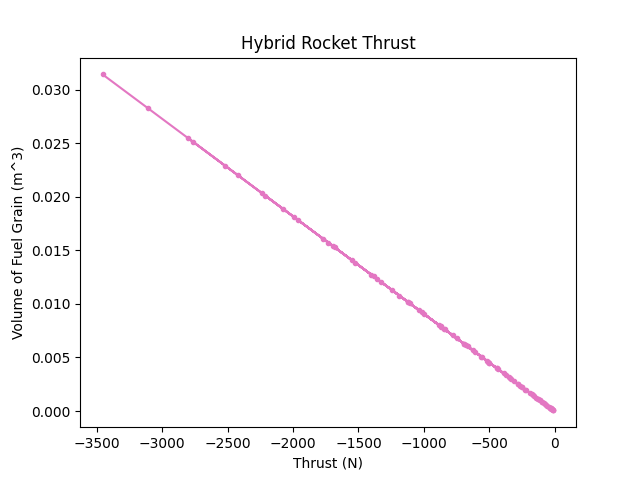

In [88]:
# Constants
A_t = 0.01  # throat area in m^2

# different fuel grain sizes
radii = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]  # fuel grain radii  m
heights = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # fuel grain heights  m

# Initialise data
OF_array, M_array, G_array, Pc_array = read_files()

for r in radii:
    for h in heights:
       
        thrust = hybrid_rocket_thrust(r, h, OF_array, M_array, G_array, Pc_array)
        thrust2dp = str(round(thrust, 2))
       
        volume = np.pi*r**2*h
        mass = volume*900
        
        t2 = (thrust/10)/mass
        print("Radius = ", r, "Height = ", h, "Thrust = ", thrust2dp, "N (2dp)", "mass = ",  mass, "t2 = ", t2)

plotThrust(radii, heights, thrust, OF_array, M_array, G_array, Pc_array)